# Code Assigment 1

For this assignment you will use a set of implementations for classifying these datasets:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Hyperparameter tunning.

5) Show some metrics that show the models are working properly.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
np.random.seed(42)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
np.random.seed(42)



# Validation and searching utils
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



import matplotlib.pyplot as plt
import seaborn as sns


# Occupancy model

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3. Please answer the following questions: 
    1. Are these datasets linearly separable? 
    2. Are these datasets randomly chosen.
    3. The sample size is enough to guarantee generalization.

4) Hyperparameter tuning
5) Show a set of metrics that show how well the model is working

## Solution

### 1 Specify which Machine Learning problem are you solving.
The machine learning problem in this case is to determine occupancy on offices, the data is obtained from https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+ , in this case we are in front of a classification problem,  where we try to classify each office into two possible classes, using data like temperature , humidity, light and so on, we want to determine if a office have occupants.

In [23]:
# Load the dataset
df_occupancy = pd.read_csv('occupancy_data/datatraining.txt')

df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [24]:
df_val_occupancy = pd.read_csv('occupancy_data/datatest.txt')
df_test_occupancy = pd.read_csv('occupancy_data/datatest2.txt')

In [25]:
dfp=pd.merge(df_occupancy,df_val_occupancy,how='outer')
df_occupancy= pd.merge(dfp,df_test_occupancy,how='outer')

In [26]:
df_occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180,27.2720,426.00,721.25,0.004793,1
1,2015-02-04 17:51:59,23.150,27.2675,429.50,714.00,0.004783,1
2,2015-02-04 17:53:00,23.150,27.2450,426.00,713.50,0.004779,1
3,2015-02-04 17:54:00,23.150,27.2000,426.00,708.25,0.004772,1
4,2015-02-04 17:55:00,23.100,27.2000,426.00,704.50,0.004757,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1
20556,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1
20557,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237,1
20558,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279,1


In [27]:
df_occupancy['Occupancy']=df_occupancy['Occupancy'].replace(0,-1)

In [28]:
# convertir la columna de fechas a un objeto datetime
df_occupancy['date'] = pd.to_datetime(df_occupancy['date'])


# establecer la fecha de referencia
reference_date = pd.to_datetime('2015-02-04')

# convertir fechas a segundos desde la fecha de referencia
df_occupancy['date_seconds'] = (df_occupancy['date'] - reference_date).dt.total_seconds()

df_occupancy['week_day']= df_occupancy['date'].dt.weekday
df_occupancy['month']=df_occupancy['date'].dt.month



In [29]:
df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_seconds,week_day,month
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,64260.0,2,2
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,64319.0,2,2
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,64380.0,2,2
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,64440.0,2,2
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,64500.0,2,2


In [30]:
df_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_occupancy=df_occupancy.drop('date',axis=1)


In [31]:
df_occupancy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_seconds,week_day,month
0,23.18,27.2720,426.0,721.25,0.004793,1,-59.0,2,2
1,23.15,27.2675,429.5,714.00,0.004783,1,0.0,2,2
2,23.15,27.2450,426.0,713.50,0.004779,1,61.0,2,2
3,23.15,27.2000,426.0,708.25,0.004772,1,121.0,2,2
4,23.10,27.2000,426.0,704.50,0.004757,1,181.0,2,2


In based on this data,in effect, date_seconds ,date ,Temperature ,Humidity ,Light ,CO2 ,HumidityRatio and  Occupancy ,  we want to determine the occupancy of a office room, in this case we can see this problem as predict a Occupancy variable where -1 is not occupied and 1 for occupied.

In [32]:
j=1
for i in df_occupancy.columns:
    print(str(j)+'. ' + i)
    j+=1

1. Temperature
2. Humidity
3. Light
4. CO2
5. HumidityRatio
6. Occupancy
7. date_seconds
8. week_day
9. month


### 2  Provide a short summary of the features and the labels you are working on.

This dataset was generated by capturing information from multiple sensors in an office, in this way 

1. Date(Seconds): The date represented in seconds and displaced to start in 0
2. Temperature: The temperature measured in degrees Celsius
3. Humidity: The humidity measured in relative humidity
4. Light: The intensity of light measured in lux.
5. $CO_{2}$: The concentration of $CO_{2}$ measured in parts per million
6. HumidityRatio: The relation between water quantity and dry air in the office.
7. Occupancy: The state of office (-1 is not occuppied and 1 is occupied)
8. Week day describes the day of the week with a number
9. Describes the number of the month

In [33]:
df_occupancy.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_seconds,week_day,month
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,2.056000e+04,20560.000000,20560.0
mean,20.906212,27.655925,130.756622,690.553276,0.004228,-0.537938,5.034071e+05,2.896109,2.0
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.843005,4.073393e+05,2.059338,0.0
min,19.000000,16.745000,0.000000,412.750000,0.002674,-1.000000,-1.855790e+05,0.000000,2.0
25%,20.200000,24.500000,0.000000,460.000000,0.003719,-1.000000,1.484260e+05,1.000000,2.0
50%,20.700000,27.290000,0.000000,565.416667,0.004292,-1.000000,4.568110e+05,3.000000,2.0
75%,21.525000,31.290000,301.000000,804.666667,0.004832,-1.000000,8.704352e+05,5.000000,2.0
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,1.178821e+06,6.000000,2.0


Here we can observe the different statistics measures of the data as a summary of principal statistical information of every variable.

### 3 Answer questions

* ¿Are this dataset linearly separable?

To see that this dataset are linearly separable we have to find a separator hiperplane who induce two partitions, in both cases we only need to find the support vector machine, if we can find it, then the data are linearly separable. But we could also run a clustering algorithm to see that we could separate the set of points in two collections, we are going to run a logistic regression algorithm to see that the data are separable and after a SVM algorithm.Also we are going to visualize the dataset and see if the two datasets looks like if were separables,in fact:

Text(0.5, 0.98, 'Marginal plot and distributions')

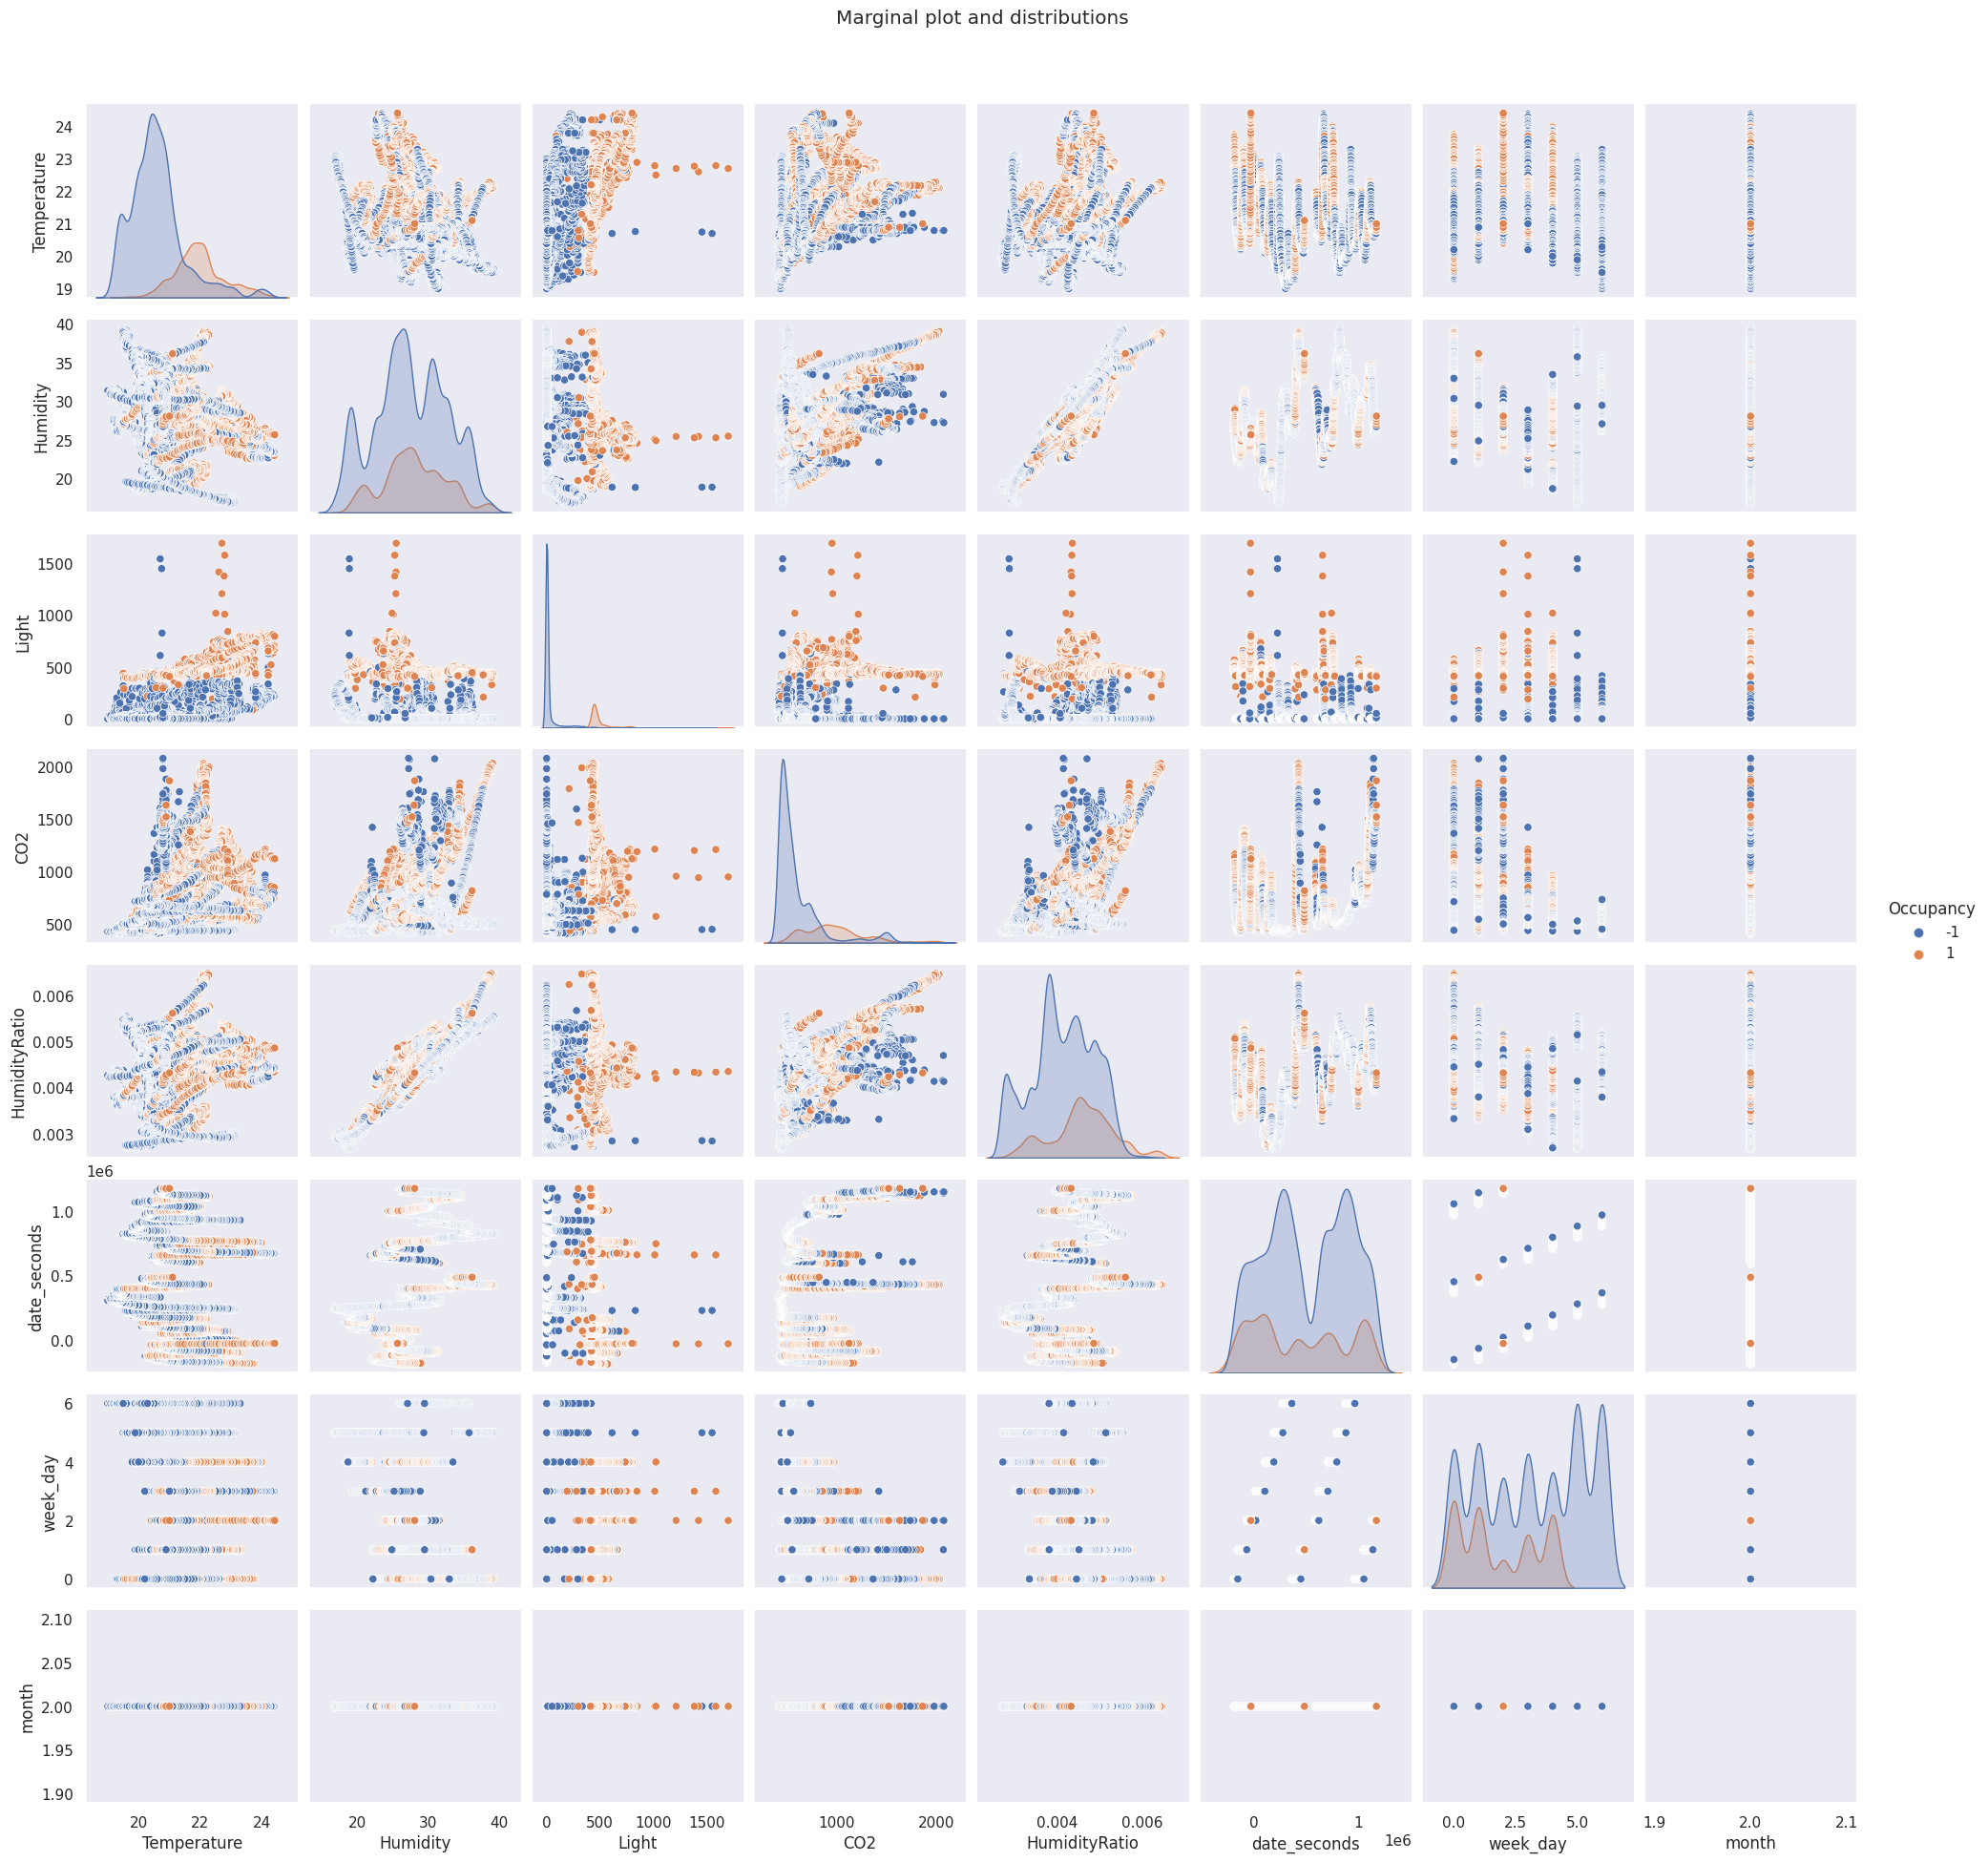

In [110]:
# Visualizing data
sns.set_theme(style="dark")
pair=sns.pairplot(df_occupancy, hue="Occupancy",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

We can see that the distributions of de data in both cases are not distinguible one for another.And also we can see a correlation matrix to see that the data are related to the labels.

<AxesSubplot: title={'center': 'Correlation Matrix'}>

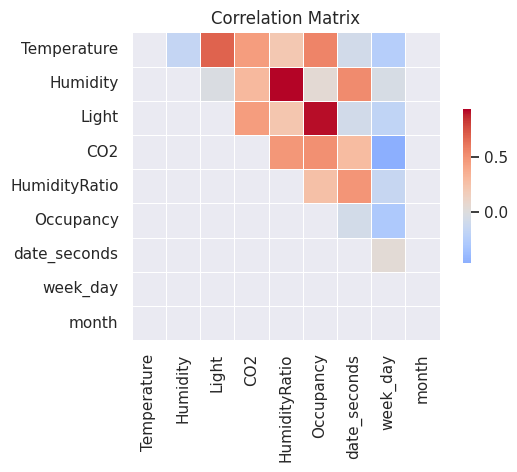

In [111]:
sns.set_theme(style="dark")
corr = df_occupancy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
X =df_occupancy.drop('Occupancy',axis=1).values
y= df_occupancy['Occupancy'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Now we are going to see if the data are linearly separable with a logistic regression over all the data

* The sample size is $12417$ and the dimension of every observation are $9$ , the dimesion $VC$ of a support vector machine is $d+1$ , in this case is $10$ then we can use an heuristics that if $N$ fulfil that $10d_{vc}(\mathcal{H})\leq N$ then the model can generalize. In this case $100\leq N$ and for this reason we can give some guarantee of generalization. An analogous reasoning give us that all the other the methods can generalize.  

### Hyperparameter Tuning

To know more about the implementation of the support vector machine, the algorithm of optimization and more, you can check the file *models.py* where are the information and the commented code, in summary we create an object with name *SVM* , now we are going to implement the model.

#### SVM

To do this we are going to use the next procedure with every model , in fact

1. Create a list of posible hyperparameters
2. Instantiate a model
3. Use GridSearch to find the best hyperparameters
4. Instantiate a new model with the best hyperparameters
5. Calculate the cross validation score and print his value

This method optimize the algorithm to the data using a form of gradient descent algorithm to optimize the weights and bias of the support vector machine, we determine the data, the epochs and the learning rate, after this the method print the precision and return the weights and bias of the support vector machine.

In [113]:
hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


model = SVC()

# Create the GridSearchCV object with the model and hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit the model using GridSearchCV and perform cross-validation
grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [114]:
# Get the best found hyperparameters
best_params = grid_search.best_params_

#  Create a new model with the best hyperparameters
svm = SVC(**best_params)

# Compute the cross-validation scores using the best model
cross_val_scores = cross_val_score(svm, X, y, cv=5)

# Print the average cross-validation score
print("Average cross-validation score:", cross_val_scores.mean())

#  Train the model using all data and the best hyperparameters
svm.fit(X, y)

Average cross-validation score: 0.989737354085603


SVC(C=1, gamma=0.1)

#### Logistic Regression

In [115]:
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] ,
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


model = LogisticRegression()

# Create the GridSearchCV object with the model and hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit the model using GridSearchCV and perform cross-validation
grid_search.fit(X, y)


/home/silverwolf/anaconda3/envs/Datascience/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [116]:
# Get the best found hyperparameters
best_params = grid_search.best_params_

#  Create a new model with the best hyperparameters
Lg = LogisticRegression(**best_params)

#  Compute the cross-validation scores using the best model
cross_val_scores = cross_val_score(Lg, X, y, cv=5)

#  Print the average cross-validation score
print("Average cross-validation score:", cross_val_scores.mean())

#  Train the model using all data and the best hyperparameters
Lg.fit(X, y)


Average cross-validation score: 0.9896887159533074


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

#### Decision Three

In [117]:
hyperparameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model = DecisionTreeClassifier()


grid_search = GridSearchCV(model, hyperparameters, cv=5)


grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [118]:
best_params = grid_search.best_params_


D3 = DecisionTreeClassifier(**best_params)


cross_val_scores = cross_val_score(D3, X, y, cv=5)


print("Average cross-validation score:", cross_val_scores.mean())


D3.fit(X, y)

Average cross-validation score: 0.964737354085603


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

#### K-Nearest Neighbor (KNN)

In [119]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = KNeighborsClassifier()


grid_search = GridSearchCV(model, hyperparameters, cv=5)


grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [120]:
best_params = grid_search.best_params_


Knn = KNeighborsClassifier(**best_params)



print("Average cross-validation score:", cross_val_scores.mean())


Knn.fit(X, y)

Average cross-validation score: 0.964737354085603


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

### Evaluation models

In [121]:
def evaluate_model(model, X, y):

    y_pred = model.predict(X)
    
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    }
    
    return metrics

In [122]:
models = [svm,Knn,Lg, D3]
model_type=['Support Vector Machine','K-Nearest Neighbors','Logistic Regression','Decision three']
count=0
for model in models:
    
    print(model_type[count])
    evaluation=evaluate_model(model,X,y)
    for key in evaluation:
        print (f'{key}:{evaluation[key]}')
    count+=1
    print('\n')

Support Vector Machine
Accuracy:0.9898832684824903
Precision:0.9602756384272395
Recall:0.9974736842105263
F1-Score:0.9785212722015695


K-Nearest Neighbors
Accuracy:0.9948443579766537
Precision:0.9849624060150376
Recall:0.9928421052631579
F1-Score:0.9888865590270497


Logistic Regression
Accuracy:0.9896887159533074
Precision:0.9600567721005677
Recall:0.9968421052631579
F1-Score:0.978103697583144


Decision three
Accuracy:0.9905642023346304
Precision:0.9652777777777778
Recall:0.9949473684210526
F1-Score:0.9798880364918101


